<a href="https://colab.research.google.com/github/IgorNascimentoDEV/Analise-dados/blob/main/Classificacao_03_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Prática 1 : **Exemplo** com Aprendizagem Supervisionada - CLASSIFICAÇÃO

**Link para a base de dados Diabetes:**[ Acesse aqui](https://senacpernambuco-my.sharepoint.com/:f:/g/personal/rafaella_nascimento_pe_senac_br/EjqdmiOUJ19NnXCHPxFlxf0BTu1QPf8j0GaRTJ7uVxNJhw?e=NcEaOv)

In [2]:
# Importando Pandas: Para manipulação de dados
import pandas as pd

In [3]:
# Guardando os dados do CSV carregado em um Dataframe Pandas
dados = pd.read_csv('/content/drive/MyDrive/Dataset-Mental-Disorders.csv', sep=',')

In [4]:
# Mostrar quantidade de Linhas x Colunas (estrutura bidimensional da base de dados)
dados.shape

(120, 19)

In [5]:
# Mostrar base de dados
dados.head()
#dados.sample(5)

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [6]:
# Verificar tipos de variáveis
dados.dtypes

Patient Number         object
Sadness                object
Euphoric               object
Exhausted              object
Sleep dissorder        object
Mood Swing             object
Suicidal thoughts      object
Anorxia                object
Authority Respect      object
Try-Explanation        object
Aggressive Response    object
Ignore & Move-On       object
Nervous Break-down     object
Admit Mistakes         object
Overthinking           object
Sexual Activity        object
Concentration          object
Optimisim              object
Expert Diagnose        object
dtype: object

# **Tratamento de dados:**

In [7]:
# Lista das colunas que precisam ser alteradas
colunas_para_alterar = ["Mood Swing", "Suicidal thoughts", "Anorxia", "Authority Respect",
                        "Try-Explanation", "Aggressive Response", "Ignore & Move-On",
                        "Nervous Break-down", "Admit Mistakes", "Overthinking"]

# Mapear valores YES e NO para 1 e 0, respectivamente
yes_no_map = {"YES ": 1, "YES": 1, "NO": 0}

# Substituir valores nas colunas especificadas
dados[colunas_para_alterar] = dados[colunas_para_alterar].replace(yes_no_map)

# Exibir o DataFrame após a substituição
print(dados)


    Patient Number     Sadness    Euphoric  Exhausted Sleep dissorder  \
0       Patiant-01     Usually      Seldom  Sometimes       Sometimes   
1       Patiant-02     Usually      Seldom    Usually       Sometimes   
2       Patiant-03   Sometimes  Most-Often  Sometimes       Sometimes   
3       Patiant-04     Usually      Seldom    Usually      Most-Often   
4       Patiant-05     Usually     Usually  Sometimes       Sometimes   
..             ...         ...         ...        ...             ...   
115    Patiant-116  Most-Often      Seldom    Usually       Sometimes   
116    Patiant-117   Sometimes   Sometimes  Sometimes          Seldom   
117    Patiant-118     Usually   Sometimes    Usually       Sometimes   
118    Patiant-119     Usually   Sometimes     Seldom          Seldom   
119    Patiant-120   Sometimes     Usually     Seldom         Usually   

     Mood Swing  Suicidal thoughts  Anorxia  Authority Respect  \
0             1                  1        0              

In [8]:
# Mapear as opções da coluna "Expert Diagnose" para números
diagnose_map = {"Bipolar Type-2": 1, "Depression": 2, "Bipolar Type-1": 3, "Normal": 4}

# Substituir valores na coluna "Expert Diagnose"
dados["Expert Diagnose"] = dados["Expert Diagnose"].replace(diagnose_map)

# Exibir o DataFrame após a substituição
print(dados)


    Patient Number     Sadness    Euphoric  Exhausted Sleep dissorder  \
0       Patiant-01     Usually      Seldom  Sometimes       Sometimes   
1       Patiant-02     Usually      Seldom    Usually       Sometimes   
2       Patiant-03   Sometimes  Most-Often  Sometimes       Sometimes   
3       Patiant-04     Usually      Seldom    Usually      Most-Often   
4       Patiant-05     Usually     Usually  Sometimes       Sometimes   
..             ...         ...         ...        ...             ...   
115    Patiant-116  Most-Often      Seldom    Usually       Sometimes   
116    Patiant-117   Sometimes   Sometimes  Sometimes          Seldom   
117    Patiant-118     Usually   Sometimes    Usually       Sometimes   
118    Patiant-119     Usually   Sometimes     Seldom          Seldom   
119    Patiant-120   Sometimes     Usually     Seldom         Usually   

     Mood Swing  Suicidal thoughts  Anorxia  Authority Respect  \
0             1                  1        0              

In [9]:
# Verificando novamente os tipos dos dados.
# Verificando a existencia de dados nulos
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    object
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted            120 non-null    object
 4   Sleep dissorder      120 non-null    object
 5   Mood Swing           120 non-null    int64 
 6   Suicidal thoughts    120 non-null    int64 
 7   Anorxia              120 non-null    int64 
 8   Authority Respect    120 non-null    int64 
 9   Try-Explanation      120 non-null    int64 
 10  Aggressive Response  120 non-null    int64 
 11  Ignore & Move-On     120 non-null    int64 
 12  Nervous Break-down   120 non-null    int64 
 13  Admit Mistakes       120 non-null    int64 
 14  Overthinking         120 non-null    int64 
 15  Sexual Activity      120 non-null    object
 16  Concentr

In [10]:
# Mostrando o numero de dados faltantes em cada coluna (Tabela não possui dados faltantes)
dados.isnull().sum()

Patient Number         0
Sadness                0
Euphoric               0
Exhausted              0
Sleep dissorder        0
Mood Swing             0
Suicidal thoughts      0
Anorxia                0
Authority Respect      0
Try-Explanation        0
Aggressive Response    0
Ignore & Move-On       0
Nervous Break-down     0
Admit Mistakes         0
Overthinking           0
Sexual Activity        0
Concentration          0
Optimisim              0
Expert Diagnose        0
dtype: int64

In [11]:
# Importar matplotlib.
import matplotlib.pyplot as plt
# Importar seaborn.
import seaborn as sns

In [12]:
# Verificando categorias ou classes
classes_diabetes = dados['Expert Diagnose'].value_counts()

print(classes_diabetes)



Expert Diagnose
1    31
2    31
4    30
3    28
Name: count, dtype: int64


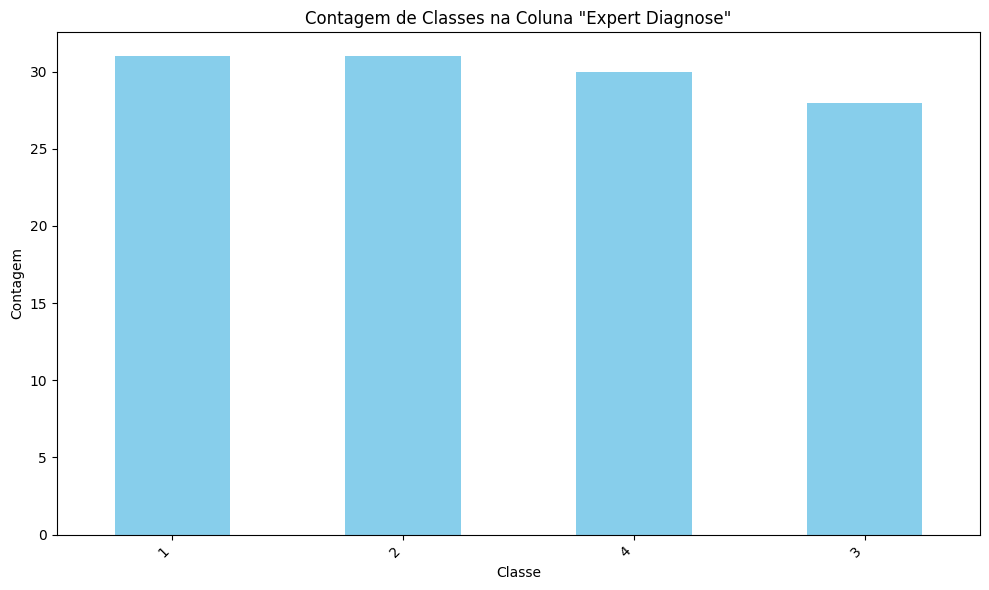

In [13]:
contagem_classes = dados['Expert Diagnose'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
contagem_classes.plot(kind='bar', color='skyblue')

# Adicionar rótulos e título
plt.title('Contagem de Classes na Coluna "Expert Diagnose"')
plt.xlabel('Classe')
plt.ylabel('Contagem')

# Exibir o gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

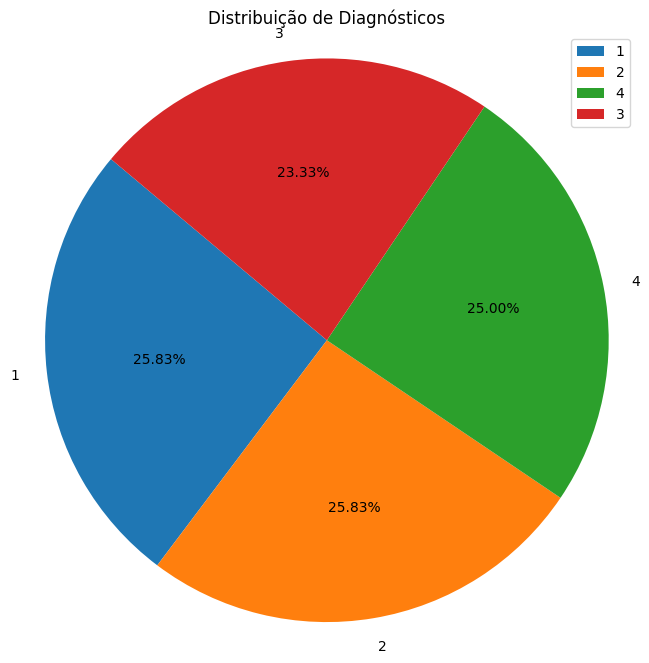

In [14]:
# Construindo o gráfico de fatias com matplotlib

contagem_diagnoses = dados['Expert Diagnose'].value_counts()

# Extrair os diagnósticos e suas contagens
diagnoses = contagem_diagnoses.index
quantidades = contagem_diagnoses.values

# Construir o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(quantidades, labels=diagnoses, autopct='%1.2f%%', startangle=140)
plt.title('Distribuição de Diagnósticos')
plt.axis('equal')
plt.legend(diagnoses, loc='best')

plt.show()

**Há variável resposta nessa base de dados?**

* Há variável resposta, variável Saida, correspondendo ao pacente ter ou não diabetes.

**Quais perguntas poderemos responder com esta base de dados?**


* Quantos pacientes têm bipolar type-2 e quantos têm depressão?
* Qual a correlação entre "Sadness" e "Suicidal thoughts"?
* Podemos prever o diagnóstico (Expert Diagnose) com  base nas características emocionais e comportamentais dos pacientes?




In [27]:
#Quantos pacientes têm bipolar type-2 e quantos têm depressão?


bipolar_type_2_count = dados[dados['Expert Diagnose'] == 1].shape[0]
depression_count = dados[dados['Expert Diagnose'] == 2].shape[0]

print("Número de pacientes com Bipolar Type-2:", bipolar_type_2_count)
print("Número de pacientes com Depressão:", depression_count)

Número de pacientes com Bipolar Type-2: 31
Número de pacientes com Depressão: 28


In [31]:
#Qual a correlação entre "Sadness" e "Suicidal thoughts"?

# Mapear as categorias da coluna "Sadness" para valores numéricos
mapa_sadness = {'Most-Often':3,'Usually': 2, 'Sometimes': 1, 'Seldom': 0}  # Defina os valores numéricos para cada categoria conforme necessário
dados['Sadness'] = dados['Sadness'].map(mapa_sadness)

# Calcular a correlação entre "Sadness" e "Suicidal thoughts"
correlation = dados['Sadness'].corr(dados['Suicidal thoughts'])

print("Correlação entre 'Sadness' e 'Suicidal thoughts':", correlation)

Correlação entre 'Sadness' e 'Suicidal thoughts': 0.2655584154998196


In [36]:
# Pré-processamento
# Converter variáveis categóricas para numéricas
label_encoder = LabelEncoder()
dados['Expert Diagnose'] = label_encoder.fit_transform(dados['Expert Diagnose'])

# Converter variáveis categóricas em representações numéricas usando one-hot encoding
dados_encoded = pd.get_dummies(dados.drop(columns=['Patient Number']))

# Dividir os dados em conjunto de treinamento e teste
X = dados_encoded.drop(columns=['Expert Diagnose'])
y = dados_encoded['Expert Diagnose']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Acurácia do modelo:", accuracy)
print("Relatório de classificação:")
print(report)

Acurácia do modelo: 0.8333333333333334
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.80      1.00      0.89         8
           2       1.00      0.50      0.67         4
           3       0.83      0.71      0.77         7

    accuracy                           0.83        24
   macro avg       0.87      0.80      0.81        24
weighted avg       0.85      0.83      0.82        24



**Qual tipo de Aprendizagem de Máquina? Qual tarefa?**

* Aprendizagem supervisionada, classificação.

In [37]:
from sklearn.model_selection import train_test_split
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# **Aprendizado de Máquina Supervisionado: Classificação**

In [38]:
# Pré-processamento
# Converter variáveis categóricas para numéricas
label_encoder = LabelEncoder()
dados['Expert Diagnose'] = label_encoder.fit_transform(dados['Expert Diagnose'])

# Converter variáveis categóricas em representações numéricas usando one-hot encoding
dados_encoded = pd.get_dummies(dados.drop(columns=['Patient Number']))

# Dividir os dados em conjunto de treinamento e teste
X = dados_encoded.drop(columns=['Expert Diagnose'])
y = dados_encoded['Expert Diagnose']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Fazer previsões com DecisionTreeClassifier
y_pred_dt = dt_model.predict(X_test)

# Avaliar o modelo DecisionTreeClassifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print("Acurácia do modelo DecisionTreeClassifier:", accuracy_dt)
print("Relatório de classificação DecisionTreeClassifier:")
print(report_dt)

# Treinar o modelo SVC
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)

# Fazer previsões com SVC
y_pred_svc = svc_model.predict(X_test)

# Avaliar o modelo SVC
accuracy_svc = accuracy_score(y_test, y_pred_svc)
report_svc = classification_report(y_test, y_pred_svc)

print("\nAcurácia do modelo SVC:", accuracy_svc)
print("Relatório de classificação SVC:")
print(report_svc)

Acurácia do modelo DecisionTreeClassifier: 0.8333333333333334
Relatório de classificação DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.88      0.93         8
           2       0.50      0.50      0.50         4
           3       0.86      0.86      0.86         7

    accuracy                           0.83        24
   macro avg       0.80      0.81      0.80        24
weighted avg       0.84      0.83      0.83        24


Acurácia do modelo SVC: 0.8333333333333334
Relatório de classificação SVC:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.78      0.88      0.82         8
           2       0.75      0.75      0.75         4
           3       1.00      0.71      0.83         7

    accuracy                           0.83        24
   macro avg       0.84      0.83      0.83       